In [1]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

In [3]:
# Getting Data

boston_dataset = load_boston()
# load_boston() is a dataset from >>> from sklearn.datasets import load_boston

data = pd.DataFrame(data = boston_dataset.data,
                   columns = boston_dataset.feature_names)

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Dropping some columns to collect important features

features = data.drop(['INDUS', 'AGE'], axis=1)
features.head(2)

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.9,9.14


In [9]:
# taking 'PRICE' dataset from boston data set and turn it into target in log form
log_prices = np.log(boston_dataset.target)
print(log_prices.shape)

# turning 'log_prices' into 2 dimensional array
target = pd.DataFrame(log_prices, columns=['PRICES'])
print(target.shape)

(506,)
(506, 1)


then, let's take average number for each features to make a dummy datasets then feed them into variable call 'property_stats'

In [12]:
# Making Dummy Data
features.mean()

CRIM         3.613524
ZN          11.363636
CHAS         0.069170
NOX          0.554695
RM           6.284634
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [16]:
type(features.mean())

pandas.core.series.Series

that variable above is in series type, now we have to turn it into array type.

In [17]:
features.mean().values
type(features.mean().values)

numpy.ndarray

then let's check the shape

In [19]:
features.mean().values.shape

(11,)

It's one dimensional array. Then, turn it into 2 dimensional array. 1 Row and 11 columns

In [20]:
features.mean().values.reshape(1,11)

array([[3.61352356e+00, 1.13636364e+01, 6.91699605e-02, 5.54695059e-01,
        6.28463439e+00, 3.79504269e+00, 9.54940711e+00, 4.08237154e+02,
        1.84555336e+01, 3.56674032e+02, 1.26530632e+01]])

In [21]:
(features.mean().values.reshape(1,11)).shape

(1, 11)

Nice! Then pass it to a variable call 'property_stats"

In [52]:
# Making some indexes to 'property_stats' as dummy data

CRIME_IDX = 0
ZN_IDX = 1
CHAS_IDX = 2
RM_IDX = 4
PTRATIO_IDX = 8



property_stats = features.mean().values.reshape(1,11)
property_stats

array([[3.61352356e+00, 1.13636364e+01, 6.91699605e-02, 5.54695059e-01,
        6.28463439e+00, 3.79504269e+00, 9.54940711e+00, 4.08237154e+02,
        1.84555336e+01, 3.56674032e+02, 1.26530632e+01]])


'CRIM_IDX = 0' means we make an index with name that match from 'features' column. 'CRIM_IDX = 0' will refer to 'CRIM' in column number 0 in 'features', 'ZN_IDX = 1' will refer to column number 1 in 'features' column and so on. We will use those indexes to make a function. See the data bellow. 
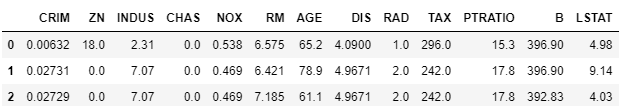

### Calculate the MSE and R-MSE

In [24]:
# contain LinearRegression methode into a variable and fitted 'features' and 'target'

regr = LinearRegression().fit(features, target)

In [33]:
# Getting Predictted values

fitted_vals = regr.predict(features)
fitted_vals

array([[3.39664677],
       [3.19835664],
       [3.41211691],
       [3.36926572],
       [3.31497108],
       [3.25264829],
       [3.108364  ],
       [2.91044427],
       [2.5413092 ],
       [2.91620602],
       [2.86872454],
       [3.04985366],
       [3.00689598],
       [3.00900293],
       [2.97077174],
       [3.00286629],
       [3.05806467],
       [2.84683392],
       [2.8669729 ],
       [2.94614728],
       [2.64187504],
       [2.88297883],
       [2.75886338],
       [2.69127888],
       [2.79037709],
       [2.71360592],
       [2.80193695],
       [2.73229701],
       [2.93654401],
       [2.98183279],
       [2.58162964],
       [2.89515735],
       [2.41421346],
       [2.72436498],
       [2.65432884],
       [3.16700996],
       [3.09994804],
       [3.15567482],
       [3.12937335],
       [3.42933686],
       [3.53510293],
       [3.33812743],
       [3.25490029],
       [3.21647699],
       [3.14153317],
       [3.12224447],
       [3.01880036],
       [2.875

In [39]:
MSE = mean_squared_error(target, fitted_vals)
MSE

0.03516080084618688

In [38]:
RMSE = MSE**0.5
RMSE

0.18751213519713034

### Creating a Function To Estimate Log Prices

In [54]:
def get_log_estimate(nr_rooms,
                    students_per_classroom,
                    next_to_river=False,
                    high_confidence=True) :
    
    # Configure property
    property_stats[0][RM_IDX] = nr_rooms
    property_stats[0][PTRATIO_IDX] = students_per_classroom
    
    # make prediction
    log_estimate = regr.predict(property_stats)[0][0]
    # log_estimate = regr.predict(property_stats) will return result in 2 dimensional array
    # with adding [0][0] means we will get raw value instead of number in array form
    
    return log_estimate

In [56]:
# Testing the function

get_log_estimate(3,19)

3.0531418755139272

In [57]:
get_log_estimate(3,10)

3.0531418755139272

In [60]:
# Adding if - else' into function.
# because the argument of 'next_to_river' is a dummy variable, '0' or '1'.

def get_log_estimate(nr_rooms,
                    students_per_classroom,
                    next_to_river=False,
                    high_confidence=True) :
    
    # Configure property
    property_stats[0][RM_IDX] = nr_rooms
    property_stats[0][PTRATIO_IDX] = students_per_classroom
    
    if next_to_river:
        property_stats[0][CHAS_IDX] = 1
    else :
        property_stats[0][CHAS_IDX] = 0
        
        
    # make prediction
    log_estimate = regr.predict(property_stats)[0][0]
    # log_estimate = regr.predict(property_stats) will return result in 2 dimensional array
    # with adding [0][0] means we will get raw value instead of number in array form
    
    return log_estimate

In [61]:
get_log_estimate(3,10, next_to_river=True)

3.151017209904831

Then we can see the different 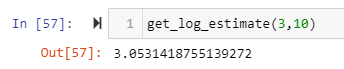 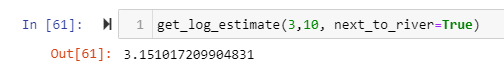

In [64]:
# Configure high confidence

def get_log_estimate(nr_rooms,
                    students_per_classroom,
                    next_to_river=False,
                    high_confidence=True) :
    
    # Configure property
    property_stats[0][RM_IDX] = nr_rooms
    property_stats[0][PTRATIO_IDX] = students_per_classroom
    
    if next_to_river:
        property_stats[0][CHAS_IDX] = 1
    else :
        property_stats[0][CHAS_IDX] = 0
     
    # make prediction
    log_estimate = regr.predict(property_stats)[0][0]
    
    # Calculation Range 
    if high_confidence :
        upper_bound = log_estimate + 2*RMSE
        lower_bound = log_estimate - 2*RMSE
        interval = 95
    else :
        upper_bound = log_estimate + RMSE
        lower_bound = log_estimate - RMSE
        interval = 68
        
    return log_estimate, upper_bound, lower_bound, interval

In [65]:
get_log_estimate(3,10, next_to_river=True)

(3.151017209904831, 3.5260414802990914, 2.7759929395105702, 95)

In [67]:
get_log_estimate(3,10, next_to_river=True, high_confidence = False)

(3.151017209904831, 3.338529345101961, 2.9635050747077005, 68)

## Adapting Valuation Tool to The Latest Situation

The data we got is coming from the past, 1970s. So what we will do now is adapting our valuation tool with our time. We need some index that comes from our time and do some modification to our calculation

In [82]:
# Getting Median of or dataset

median_property = np.median(boston_dataset.target)
median_property

21.2

#### Getting median of property in our time
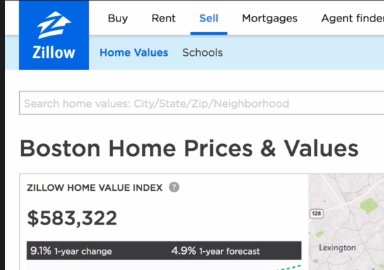

Let's say, the median of property in our time is : 583

In [84]:
zillow_median_price = 583

In [85]:
# Getting Realistic Value of Our Time

scale_factor = zillow_median_price / median_property
scale_factor

27.5

In [87]:
log_est, upper, lower, conf = get_log_estimate(9, students_per_classroom=15,
                                              next_to_river=False, high_confidence=False)

In [91]:
# convert to today's dollar
dollar_est = np.e**log_est * 1000 * scale_factor
round(dollar_est,-2)

826300.0

In [92]:
upper_price = np.e**upper*1000*scale_factor
round(upper_price,-2)

996700.0

In [93]:
lower_price = np.e**lower*1000*scale_factor
round(lower_price,-2)

685000.0

### Wrapping Them All Into A Function

In [96]:
def get_dollar_estimated(rm, ptratio, chas=False, large_range=True) :
    log_est, upper, lower, conf = get_log_estimate(rm, ptratio,
                                              next_to_river=chas, high_confidence=large_range)
    
    # convert to today's dollar
    
    
    dollar_est = np.e**log_est * 1000 * scale_factor
    upper_price = np.e**upper*1000*scale_factor
    lower_price = np.e**lower*1000*scale_factor
    
    print('The estimated property value is $', round(dollar_est,-2))
    print(f'At {conf}% confidence the valuation range is')
    print(f'USD {round(lower_price,-2)} at the lower end to USD {round(upper_price,-2)} at the high end.')

In [97]:
get_dollar_estimated(6,12, True)

The estimated property value is $ 782400.0
At 95% confidence the valuation range is
USD 537700.0 at the lower end to USD 1138400.0 at the high end.


### Exericise : Do Improvitation

In [99]:
featurex = data.drop(['INDUS', 'AGE','B','ZN'], axis=1)
featurex.head(2)

,CRIM,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,9.14


In [102]:
featurex.mean()

CRIM         3.613524
CHAS         0.069170
NOX          0.554695
RM           6.284634
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
LSTAT       12.653063
dtype: float64

In [101]:
featurex.mean().values.reshape(1,9)

array([[3.61352356e+00, 6.91699605e-02, 5.54695059e-01, 6.28463439e+00,
        3.79504269e+00, 9.54940711e+00, 4.08237154e+02, 1.84555336e+01,
        1.26530632e+01]])

In [120]:
CRIME_IDX = 0
CHAS_IDX = 1
NOX_IDX = 2
RM_IDX = 3
DIS_IDX = 4
RAD_IDX = 5
TAX_IDX = 6
PTRATIO_IDX = 7
LSTAT_IDX = 8



property_statx = featurex.mean().values.reshape(1,9)
property_statx

array([[3.61352356e+00, 6.91699605e-02, 5.54695059e-01, 6.28463439e+00,
        3.79504269e+00, 9.54940711e+00, 4.08237154e+02, 1.84555336e+01,
        1.26530632e+01]])

### Calculate the MSE and R-MSE

In [106]:
# fitting the target and the featurex with LINEREGRESSION Module from sckit learn 

regrx = LinearRegression().fit(featurex, target)

In [110]:
fitted_valx = regrx.predict(featurex)
fitted_valx

array([[3.39938006],
       [3.21694817],
       [3.43708624],
       [3.39842487],
       [3.34053314],
       [3.28013509],
       [3.11732406],
       [2.91418352],
       [2.53926118],
       [2.9306423 ],
       [2.87528305],
       [3.06174016],
       [3.01390039],
       [3.01276274],
       [2.97765479],
       [3.00567109],
       [3.06624091],
       [2.84500904],
       [2.9060841 ],
       [2.94339464],
       [2.63477487],
       [2.87804595],
       [2.74646096],
       [2.67977977],
       [2.78470506],
       [2.74585053],
       [2.80700638],
       [2.7620637 ],
       [2.93703695],
       [2.98472252],
       [2.58239381],
       [2.89837156],
       [2.46036306],
       [2.72726904],
       [2.70003826],
       [3.16671937],
       [3.10600427],
       [3.16016119],
       [3.1331568 ],
       [3.37529562],
       [3.48314473],
       [3.37039887],
       [3.28752249],
       [3.24276333],
       [3.16783051],
       [3.14101943],
       [3.03333082],
       [2.890

In [137]:
MSEx = mean_squared_error(target, fitted_valx)
MSEx

0.0365118128040271

In [138]:
RMSEx = MSEx**0.5
RMSEx

0.191080644765573

### Making a Function

In [139]:
def x_log_estimate(total_rooms,
                   polution_index,
                   students_per_classroom,
                   weighted_distance_to_workplace,
                   next_to_river=False,
                   high_confidence=True) :
    
    # Configure property
    property_statx[0][RM_IDX] = total_rooms
    property_statx[0][PTRATIO_IDX] = students_per_classroom
    property_statx[0][NOX_IDX] = polution_index
    property_statx[0][DIS_IDX] = weighted_distance_to_workplace
    property_statx[0][CHAS_IDX] = next_to_river
    
    if next_to_river:
        property_statx[0][CHAS_IDX] = 1
    else :
        property_statx[0][CHAS_IDX] = 0
    
    # make prediction
    log_estimatex = regrx.predict(property_statx)[0][0]
    
    
    # Calculation Range 
    if high_confidence :
        upper_bound = log_estimatex + 2*RMSEx
        lower_bound = log_estimatex - 2*RMSEx
        interval = 95
    else :
        upper_bound = log_estimatex + RMSEx
        lower_bound = log_estimatex - RMSEx
        interval = 68
        
    return log_estimatex, upper_bound, lower_bound, interval
    

In [140]:
# Testing Fucntion

x_log_estimate(total_rooms = 4,
               polution_index = 1,
               students_per_classroom = 25,
               weighted_distance_to_workplace = 8,
               next_to_river = False,
               high_confidence = True
               )

(2.015257251803663, 2.397418541334809, 1.633095962272517, 95)

## Adapting Valuation Tool to The Latest Situation

### Step 1 : Getting Median from our dataset

In [116]:
featurex.mean()

CRIM         3.613524
CHAS         0.069170
NOX          0.554695
RM           6.284634
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
LSTAT       12.653063
dtype: float64

In [141]:
median_propertyx = np.median(boston_dataset.target)
median_propertyx

21.2

### Step 2 : Getting Median from Today's dataset

In [142]:
# taking data from zillow.com

zillow_median_price = 583

### Step 3 : Scalling Median Factor from Past vs Now 

In [143]:
scale_factor = zillow_median_price / median_propertyx
scale_factor

27.5

### Step 4 : Converting Price into Today's Inflation

In [144]:
# convert to today's dollar
dollar_est = np.e**log_est * 1000 * scale_factor
print(round(dollar_est,-2))

upper_price = np.e**upper*1000*scale_factor
print(round(upper_price,-2))

lower_price = np.e**lower*1000*scale_factor
print(round(lower_price,-2))

826300.0
996700.0
685000.0


# Wrapping Them Up

In [147]:
def shock_maker_PRO_MAX_version(total_rooms,
                                polution_index,
                                students_per_classroom,
                                weighted_distance_to_workplace,
                                next_to_river=False,
                                high_confidence=True) :
    
    log_estx, upper, lower, conf = x_log_estimate(total_rooms,
                                                 polution_index,
                                                 students_per_classroom,
                                                 weighted_distance_to_workplace,
                                                 next_to_river=False,
                                                 high_confidence=True) 
    
    dollar_est = np.e**log_estx * 1000 * scale_factor
    upper_price = np.e**upper*1000*scale_factor
    lower_price = np.e**lower*1000*scale_factor
    
    print('The estimated property value is $', round(dollar_est,-2))
    print(f'At {conf}% confidence the valuation range is')
    print(f'USD {round(lower_price,-2)} at the lower end to USD {round(upper_price,-2)} at the high end.')

In [148]:
shock_maker_PRO_MAX_version(total_rooms = 4,
               polution_index = 1,
               students_per_classroom = 25,
               weighted_distance_to_workplace = 8,
               next_to_river = False,
               high_confidence = True)

The estimated property value is $ 206300.0
At 95% confidence the valuation range is
USD 140800.0 at the lower end to USD 302400.0 at the high end.


In [151]:
shock_maker_PRO_MAX_version(total_rooms = 4,
               polution_index = 0.2,
               students_per_classroom = 25,
               weighted_distance_to_workplace = 5,
               next_to_river = False,
               high_confidence = True)

The estimated property value is $ 445000.0
At 95% confidence the valuation range is
USD 303700.0 at the lower end to USD 652200.0 at the high end.


# Testing the boston valuation module

In [149]:
import exe_module_boston_valuation as embv

In [150]:
embv.shock_maker_PRO_MAX_version(total_rooms = 4,
               polution_index = 1,
               students_per_classroom = 25,
               weighted_distance_to_workplace = 8,
               next_to_river = False,
               high_confidence = True)

The estimated property value is $ 206300.0
At 95% confidence the valuation range is
USD 140800.0 at the lower end to USD 302400.0 at the high end.


In [77]:
def prime_check(n) :
    if n > 1 :
        for i in range(2, n-1) :
            if n % i == 0 :
                print(f'{n} is not prime number')
                break
            else :
                print(f'{n} is prime number')
                break

In [80]:
prime_check(31)

31 is prime number
